In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
%matplotlib inline

line_markers = ['-.','-,','-o','-v','-^','-<','->','-1','-2','-3','-4','-s','-p','-*','-h','-H','-+','-x','-D','-d','-|','-_']
line_markers = ['*','h','<','4','x','d','|','_']

In [2]:
def accuracy(file_name, tasknum = 10):
    acc = np.zeros(tasknum)
    with open(file_name, 'r') as f:
        data = f.read().splitlines()
        for i in range(len(data)):
            acc[i] = data[i]
    return acc

[86 82 75 70 65 61 58 55 52 51]
72.77777777777777


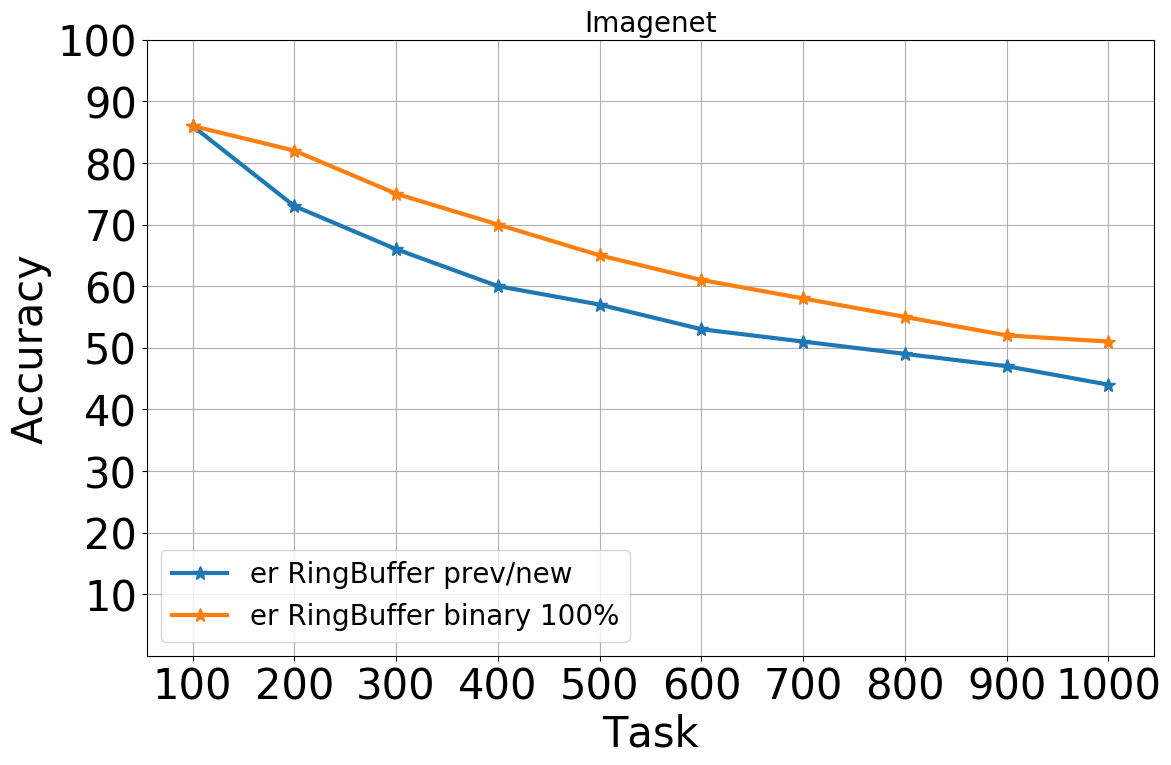

In [3]:
er_prev_new = np.array([86, 73, 66, 60, 57, 53, 51, 49, 47, 44])
er_prev_new_binary_100 = np.array([86, 82, 75, 70, 65, 61, 58, 55, 52, 51])
task = (np.arange(10) + 1)*100

plt.style.use('default')
plt.figure(figsize=(13,8))
plt.plot(task, er_prev_new, linestyle='-', label='er RingBuffer prev/new',marker = line_markers[0], linewidth=3, markersize=10)
plt.plot(task, er_prev_new_binary_100, linestyle='-', label='er RingBuffer binary 100%',marker = line_markers[0], linewidth=3, markersize=10)

plt.grid(b=True, which='major', axis='both')
plt.xticks([100,200,300,400,500,600,700,800,900,1000], fontsize = 30)

plt.xlabel('Task', fontsize=30)
plt.ylabel('Accuracy', fontsize=30)
plt.ylim(0,100)
plt.yticks([10,20,30,40,50,60,70,80,90,100], fontsize = 30)
# plt.set_yticklabels(['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.title('Imagenet', fontsize = 20)
plt.legend(loc = 'lower left', fontsize=20)

print(er_prev_new_binary_100)
print(er_prev_new_binary_100.sum()/9)

In [4]:
# result = sio.loadmat('191212_Imagenet_ood_0_memsz_20000_alpha_1_base_100_replay_64_batch_128_epoch_100_factor_4_RingBuffer.mat')
# print(result.keys())
# print('Batch: 128, Replay batch: 64, factor:4, uniform penalty')
# print('Cheat Top-1')
# print(result['cheat']['correct'][0][0][0])
# print('All Top-1')
# print(result['all']['correct'][0][0][0])
# print('Prev/new Top-1')
# print(result['prev_new']['correct'][0][0][0])
# print('Task Top-1')
# print(result['task']['correct'][0][0][0])

# print('Cheat Top-5')
# print(result['cheat']['correct_5'][0][0][0])
# print('All Top-5')
# print(result['all']['correct_5'][0][0][0])
# print('Prev/new Top-5')
# print(result['prev_new']['correct_5'][0][0][0])
# print('Task Top-5')
# print(result['task']['correct_5'][0][0][0])

# print('Sigmoid')
# print(result['sigmoid'][0])
# print('AUROC')
# print(result['auroc'][0])

# print('Stat')

# print('All')
# print(result['all']['stat'][0][0])
# print('Prev/new')
# print(result['prev_new']['stat'][0][0])
# print('Task')
# print(result['task']['stat'][0][0])
# print(result['task_soft_1'])

In [5]:
result = sio.loadmat('191212_Imagenet_ood_0_memsz_20000_alpha_1_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, uniform penalty')

print('Sigmoid')
print(result['sigmoid'][0])
print('AUROC')
print(result['auroc'][0])

print(result['task_soft_1'])


dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, uniform penalty
Sigmoid
[72.6        73.52666667 74.33       73.616      72.76333333 73.86571429
 73.7125     73.73555556 71.498     ]
AUROC
[0.79523874 0.80691392 0.79799797 0.7896736  0.79050344 0.81842191
 0.80591812 0.79429603 0.81973715]
[[84.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [27. 79.  0.  0.  0.  0.  0.  0.  0.  0.]
 [20. 32. 80.  0.  0.  0.  0.  0.  0.  0.]
 [18. 27. 32. 79.  0.  0.  0.  0.  0.  0.]
 [16. 24. 26. 33. 78.  0.  0.  0.  0.  0.]
 [15. 21. 23. 24. 29. 80.  0.  0.  0.  0.]
 [12. 18. 20. 19. 22. 30. 81.  0.  0.  0.]
 [13. 17. 17. 19. 20. 26. 30. 81.  0.  0.]
 [12. 15. 16. 18. 18. 24. 24. 34. 79.  0.]
 [13. 14. 18. 16. 18. 21. 22. 26. 32. 83.]]


dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, uniform penalty, alpha: 2
Sigmoid
[72.15       64.59333333 59.88       57.82       54.16       53.76571429
 52.99      ]
AUROC
[0.85102954 0.85456243 0.84464181 0.83008721 0.83691766 0.84641093
 0.85087445]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [45. 84.  0.  0.  0.  0.  0.  0.  0.  0.]
 [35. 44. 84.  0.  0.  0.  0.  0.  0.  0.]
 [35. 37. 48. 84.  0.  0.  0.  0.  0.  0.]
 [31. 32. 33. 48. 84.  0.  0.  0.  0.  0.]
 [27. 30. 31. 40. 48. 84.  0.  0.  0.  0.]
 [23. 27. 27. 34. 37. 50. 85.  0.  0.  0.]
 [22. 23. 24. 31. 33. 39. 52. 86.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


Text(0.5,1,'AUROC: 0.851')

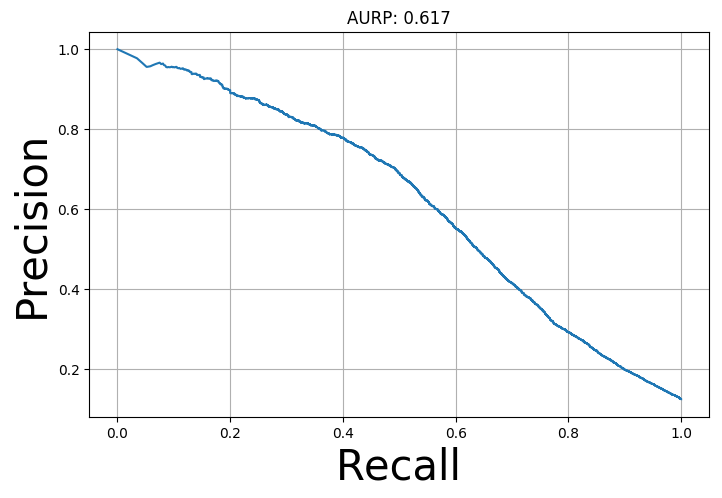

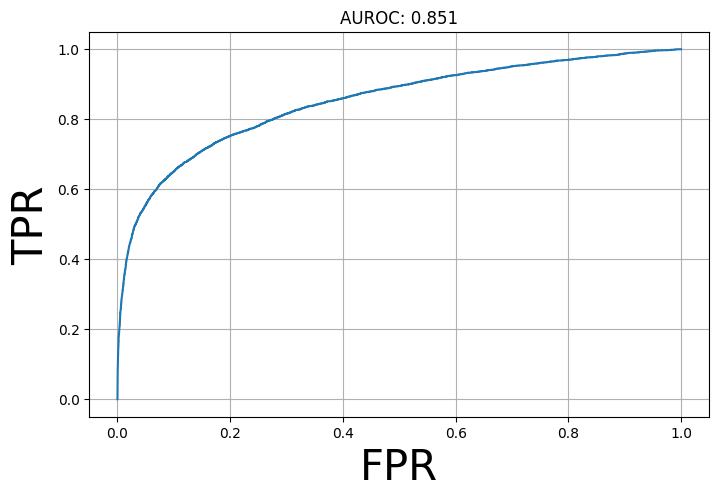

In [16]:
result = sio.loadmat('191212_Imagenet_ood_0_memsz_20000_alpha_2.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, uniform penalty, alpha: 2')

print('Sigmoid')
print(result['sigmoid'][0])
print('AUROC')
print(result['auroc'][0])

print(result['task_soft_1'])

idx = 6
end = 30000

precision, recall, thresholds = precision_recall_curve(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
fpr, tpr, thresholds = roc_curve(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
aupr = average_precision_score(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
auroc = roc_auc_score(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
plt.style.use('default')
plt.figure(figsize=(8,5))
plt.plot(recall, precision, linestyle='-', label='bin_prob')
plt.grid(b=True, which='major', axis='both')
plt.xlabel('Recall', fontsize=30)
plt.ylabel('Precision', fontsize=30)
plt.title('AURP: %.3f'%aupr)

plt.style.use('default')
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, linestyle='-', label='bin_prob')
plt.grid(b=True, which='major', axis='both')
plt.xlabel('FPR', fontsize=30)
plt.ylabel('TPR', fontsize=30)
plt.title('AUROC: %.3f'%auroc)


In [7]:
result = sio.loadmat('191212_Imagenet_ood_0_memsz_20000_alpha_1_base_100_replay_32_batch_128_epoch_100_factor_2_RingBuffer.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:2, uniform penalty')

print('Sigmoid')
print(result['sigmoid'][0])
print('AUROC')
print(result['auroc'][0])

print('Stat')

print(result['task_soft_1'])

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:2, uniform penalty
Sigmoid
[74.15       74.12666667 73.7        71.64       70.57       71.24571429
 71.3125     71.15111111 67.926     ]
AUROC
[0.82104956 0.83904413 0.82802417 0.81182659 0.81427331 0.83846401
 0.82986088 0.81816689 0.8332454 ]
Stat
[[84.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [25. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [17. 27. 83.  0.  0.  0.  0.  0.  0.  0.]
 [17. 22. 29. 82.  0.  0.  0.  0.  0.  0.]
 [17. 19. 21. 27. 82.  0.  0.  0.  0.  0.]
 [15. 15. 17. 21. 26. 83.  0.  0.  0.  0.]
 [12. 13. 13. 15. 17. 27. 84.  0.  0.  0.]
 [11. 10. 13. 14. 17. 22. 30. 84.  0.  0.]
 [ 8.  9. 11. 13. 11. 17. 22. 29. 82.  0.]
 [ 8.  7. 11. 12.  9. 15. 17. 20. 30. 86.]]


In [8]:
result = sio.loadmat('191212_Imagenet_ood_0_memsz_20000_alpha_1_base_100_replay_64_batch_128_epoch_100_factor_4_RingBuffer.mat')
print(result.keys())
print('Batch: 128, Replay batch: 64, factor:4, uniform penalty')

print('Sigmoid')
print(result['sigmoid'][0])
print('AUROC')
print(result['auroc'][0])

print('Stat')

print(result['task_soft_1'])

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 64, factor:4, uniform penalty
Sigmoid
[72.43       72.94666667 73.955      73.552      71.96333333 73.42
 73.33       73.38666667 70.768     ]
AUROC
[0.78794534 0.80191243 0.79542467 0.78531324 0.78512995 0.81463047
 0.80689506 0.796426   0.81585807]
Stat
[[84.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [26. 79.  0.  0.  0.  0.  0.  0.  0.  0.]
 [18. 32. 80.  0.  0.  0.  0.  0.  0.  0.]
 [18. 28. 32. 78.  0.  0.  0.  0.  0.  0.]
 [15. 22. 25. 32. 79.  0.  0.  0.  0.  0.]
 [13. 21. 22. 24. 30. 81.  0.  0.  0.  0.]
 [11. 17. 19. 20. 22. 31. 82.  0.  0.  0.]
 [12. 15. 18. 19. 22. 26. 30. 81.  0.  0.]
 [11. 14. 15. 19. 19. 24. 24. 34. 79.  0.]
 [10. 14. 16. 19. 19. 22. 22. 27. 33. 83.]]


In [9]:
result = sio.loadmat('191212_Imagenet_ood_0_memsz_20000_alpha_1_base_100_replay_64_batch_128_epoch_100_factor_2_RingBuffer.mat')
print(result.keys())
print('Batch: 128, Replay batch: 64, factor:2, uniform penalty')

print('Sigmoid')
print(result['sigmoid'][0])
print('AUROC')
print(result['auroc'][0])

print('Stat')

print(result['task_soft_1'])

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 64, factor:2, uniform penalty
Sigmoid
[73.59       73.39333333 72.785      72.14       69.99       70.94285714
 70.295      69.87777778 67.722     ]
AUROC
[0.81699562 0.83170221 0.82617098 0.81445093 0.81267615 0.83535474
 0.82607253 0.81438429 0.8346273 ]
Stat
[[84.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [27. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [19. 29. 83.  0.  0.  0.  0.  0.  0.  0.]
 [19. 23. 29. 82.  0.  0.  0.  0.  0.  0.]
 [17. 20. 19. 28. 82.  0.  0.  0.  0.  0.]
 [15. 16. 16. 23. 26. 83.  0.  0.  0.  0.]
 [13. 15. 15. 18. 19. 30. 85.  0.  0.  0.]
 [10. 12. 13. 15. 16. 22. 28. 84.  0.  0.]
 [ 9. 10. 11. 12. 13. 20. 21. 29. 82.  0.]
 [ 7.  9. 11. 10. 11. 15. 18. 22. 31. 86.]]


In [10]:
result = sio.loadmat('191212_Imagenet_ood_0_memsz_20000_alpha_1_base_100_replay_32_batch_128_epoch_100_factor_1_RingBuffer.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:1, uniform penalty')

print('Sigmoid')
print(result['sigmoid'][0])
print('AUROC')
print(result['auroc'][0])

print('Stat')

print(result['task_soft_1'])

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:1, uniform penalty
Sigmoid
[75.8        74.21333333 73.225      71.404      68.96666667]
AUROC
[0.84223966 0.85243327 0.84340571 0.82968711 0.8279548 ]
Stat
[[84.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [26. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [16. 23. 85.  0.  0.  0.  0.  0.  0.  0.]
 [12. 15. 24. 84.  0.  0.  0.  0.  0.  0.]
 [11. 12. 14. 24. 83.  0.  0.  0.  0.  0.]
 [11. 10. 12. 16. 21. 85.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [11]:
result = sio.loadmat('191212_Imagenet_ood_0_memsz_20000_alpha_1_base_100_replay_32_batch_128_epoch_100_factor_1_RingBuffer_rand_init.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:1, uniform penalty')

print('Sigmoid')
print(result['sigmoid'][0])
print('AUROC')
print(result['auroc'][0])

print('Stat')

print(result['task_soft_1'])

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:1, uniform penalty
Sigmoid
[75.84 74.14]
AUROC
[0.84265338 0.85497494]
Stat
[[84.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [27. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [12. 19. 85.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
